In [8]:
import warnings
warnings.filterwarnings('ignore')

# Examples
This notebook contains examples of how to use the SDCC to calculate material properties of particles.

# Defining a particle
A particle in the SDCC is defined by a number of parameters:

`TMx` is the % titanomagnetite in the composition  
`PRO` is the prolateness of the ellipsoid geometry (major axis/intermediate axis)  
`OBL` is the oblateness of the ellipsoid geometry (intermediate axis/minor axis)  
`alignment` is the direction of the elongation, either `easy` for along an easy axis or `hard` for along a hard axis.  
`T` is the temperature at which the surface is being evaluated (optional)  
`ext_field` is the external field - `[theta,phi,intensity (T)]` (optional)

Other magnetic minerals and shapes will be available in the future.

Here, we're going to define a particle as a sphere of magnetite:

In [31]:
TMx = 0
alignment = 'hard'
PRO = 1.00
OBL = 1.00

# Plotting energy surfaces.

The `sdcc.plotting` module has several plots for different types of results the SDCC can generate. One of the quickest operations in the SDCC is to plot an energy surface. The `plot_energy_surface` function can be used to quickly do this for a particle in an equirectangular projection. Note that the coordinates $\theta$ and $\phi$ used in this plot correspond to a convention similar to declination and inclination, and not to typical spherical coordinates.

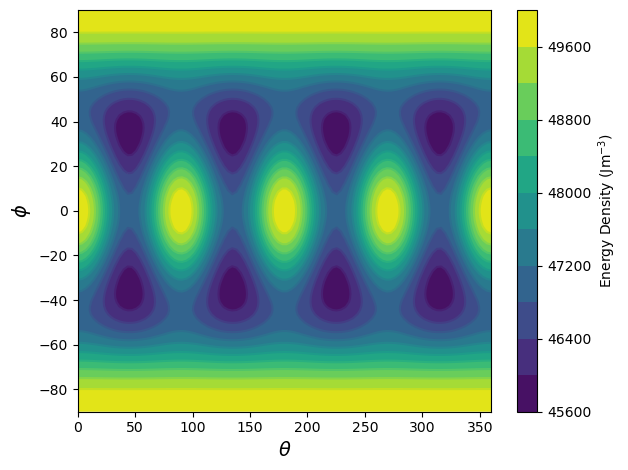

In [32]:
from sdcc.plotting import plot_energy_surface
plot_energy_surface(TMx,alignment,PRO,OBL);

A more useful projection would be to use upper and lower hemisphere stereographic projections, which can be used by passing the argument `projection = 'stereo'`.

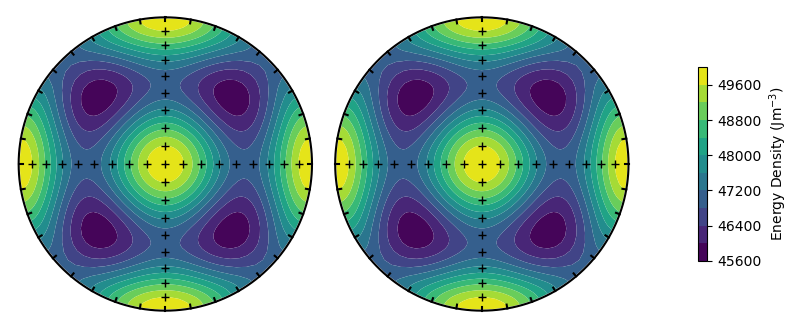

In [33]:
plot_energy_surface(TMx,alignment,PRO,OBL,projection = 'stereo');

The SDCC can rapidly calculate energy surfaces for particles with different parameters. For example, we can calculate the energy surface for an elongate ellipsoid by increasing the `PRO` parameter. The SDCC is set up so the major axis is always along $x$ (or North in the stereographic projection). The minor axis is always along $z$ (or up) and the intermediate axis is always along $y$ (or East).

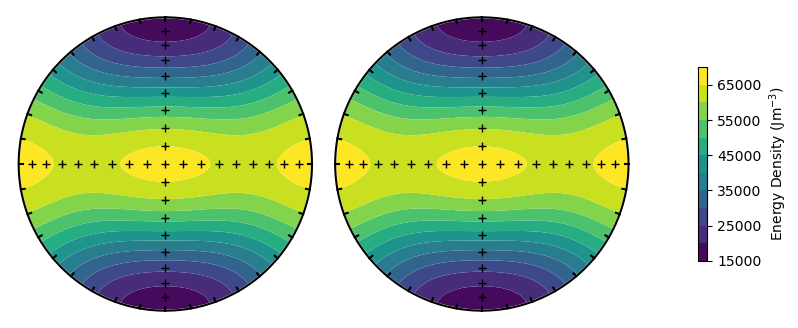

In [34]:
PRO = 3.00
plot_energy_surface(TMx,alignment,PRO,OBL,projection = 'stereo');

Alternatively, we could change the titanomagnetite composition to see a change in magnetocrystalline anisotropy

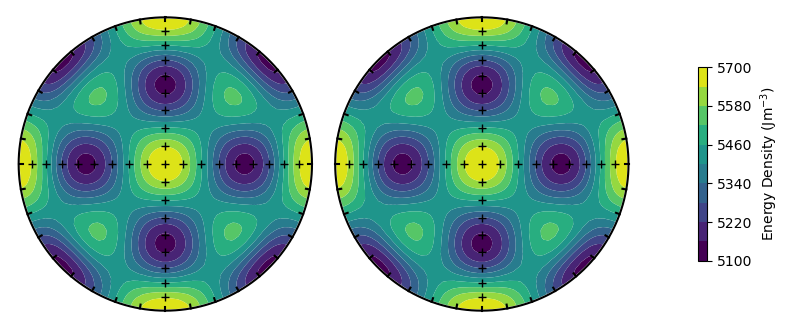

In [35]:
PRO = 1.00
TMx = 55
plot_energy_surface(TMx,alignment,PRO,OBL,projection = 'stereo');

We have not yet changed the temperature or external field. These can be changed using the optional `T` and `ext_field` arguments. Changing the temperature does not change the shape of the surface for magnetocrystalline particles, but note the change in the scale on the colorbar compared to our first image.

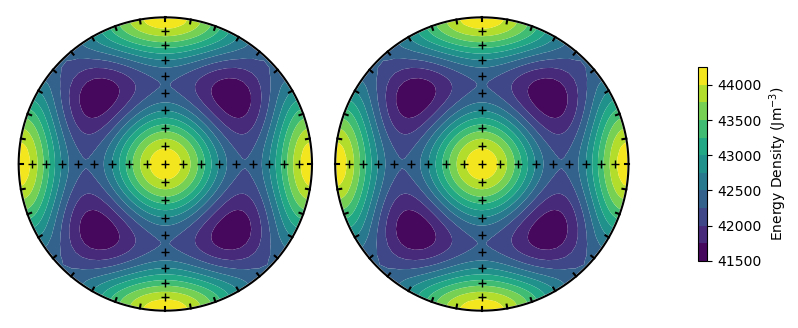

In [36]:
TMx = 0
T = 100
plot_energy_surface(TMx,alignment,PRO,OBL,T = T,projection = 'stereo');

Changing the external field will show a difference between the upper and lower hemisphere projections (as the field differs between the two).

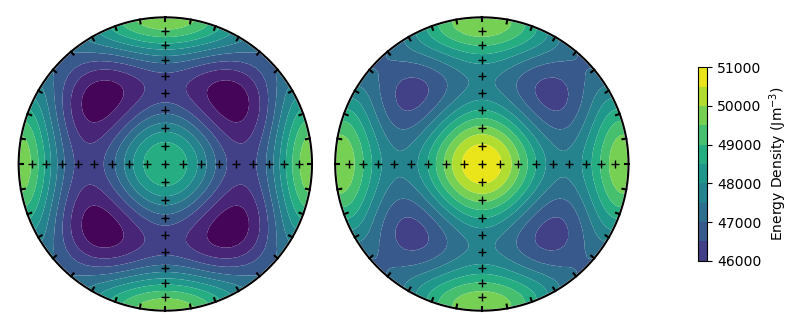

In [37]:
ext_field = [0,90,2e-3] #Dec 0, inc 90 (vertically up), 2 mT field
plot_energy_surface(TMx,alignment,PRO,OBL,ext_field = ext_field,projection = 'stereo');

Finally, we can rotate the magnetocrystalline directions using the `alignment` argument.

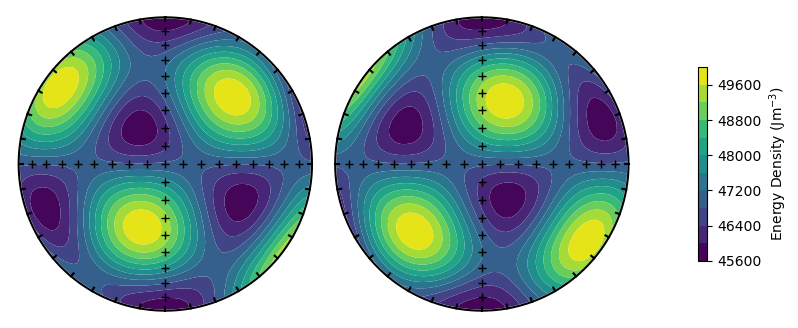

In [38]:
alignment = 'easy'
plot_energy_surface(TMx,alignment,PRO,OBL,projection = 'stereo');

# Calculating energy barriers

Functions in the `barriers` module are used to calculate energy barriers. Let's take the cubic magnetite particle from before.

In [55]:
TMx = 0
alignment = 'easy'
PRO = 1.00
OBL = 1.00

We can calculate the LEM states and energy barriers using the `find_all_barriers()` function. This will output the $\theta$ and $\phi$ coordinates of the barriers as well as the energies.

In [56]:
from sdcc.barriers import find_all_barriers
lem_t, lem_p, lem_e, bar_t, bar_p, bar_e = find_all_barriers(TMx, alignment, PRO, OBL)

This produces a large number of arrays - a good way to visualize the LEM states and energy barriers is using the `plotting.plot_minima()` and `plotting.plot_barriers()` functions.

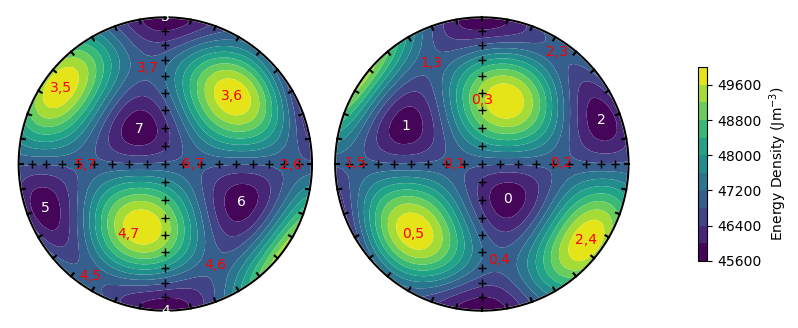

In [57]:
from sdcc.plotting import plot_minima, plot_barriers
plot_energy_surface(TMx, alignment, PRO, OBL, projection = 'stereo')
plot_minima(lem_t, lem_p, projection = 'stereo')
plot_barriers(bar_t, bar_p, projection = 'stereo')

You may notice that there are some spurious energy barriers near energy maxima. These won't affect our results, as the relaxation times of these spurious barriers are far larger than those of the smaller barriers, which will dominate our results.

We can also visualize the energy barriers using the `energy_matrix_plot` function. This function graphically displays the value of the energy barriers between the $i$th and $j$th state in a matrix.

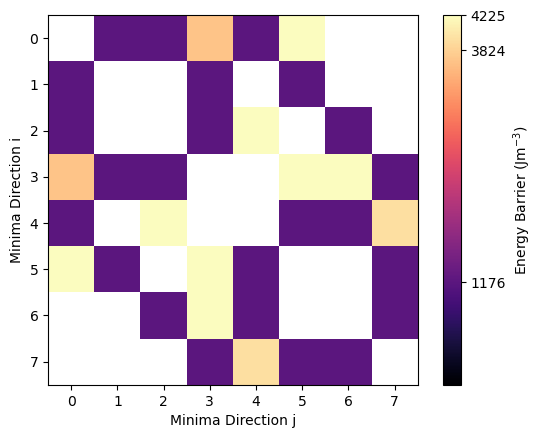

In [62]:
from sdcc.plotting import energy_matrix_plot
energy_matrix_plot(bar_e)

The spurious barriers clearly come up as lighter colors and are 3 - 4 x larger. Given that relaxation time scales with exp(barrier), these will have far longer relaxation times and so will have a minimal effect on our overall relaxation rate.

# Saving energy barriers
We can save the energy barriers between states at all temperatures using the GrainEnergyLandcape or GEL (`barriers.GEL`) object. Saving one of these objects requires a large number of calculations at each temperature and so may take several minutes. Below is code for saving an elongate magnetite particle to a GEL object, although we comment this out to save time.

In [64]:
from sdcc.barriers import GEL
TMx = 0
alignment = 'hard'
PRO = 2.50
OBL = 1.00

#thermParticle = GEL.get_params(TMx,alignment,PRO,OBL)

GEL objects can be saved to file using the .to_file() argument. This saves them using the `pickle` file format. We can load saved GEL files using the `pickle` module. A large number of precomputed GEL files are available in the `particles` folder.

In [81]:
import pickle
#GEL.to_file('test.gel')
with open('../particles/TM00_PRO_2.50_OBL_1.00_hard.gel', 'rb') as f:
    thermParticle=pickle.load(f)

Similarly a `HELs` object exists for high-field experiments. These objects need to compute energy barriers in a range of field strengths and field orientations. In some cases, they may take hours to create, but can again be easily saved. `HELs` objects also require you to input a maximum field (in Tesla). 

In [72]:
from sdcc.barriers import HELs
#hystParticle = HELs(TMx, alignment, PRO, OBL, B_max = 0.3)

# Visualizing energy barriers with temperature

The change in relaxation time with temperature of a `GEL` object can be visualized with a Pullaiah curve (Pullaiah et. al., 1975). In the SDCC, we can plot these using the `plotting.plot_pullaiah_curves()` function. To draw a pullaiah curve, we need to specify a size, and we need to give the indices of the energy barrier

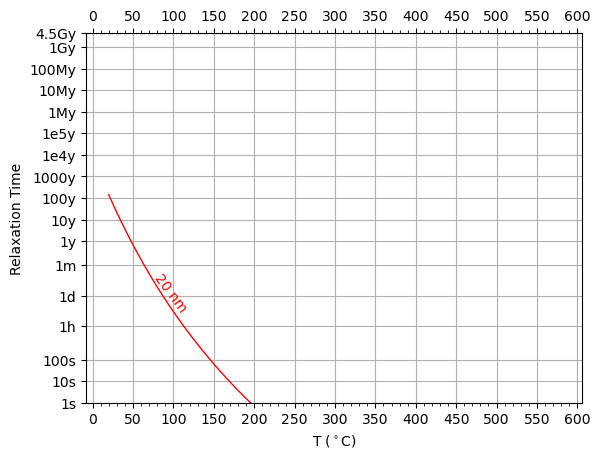

In [86]:
from sdcc.plotting import plot_pullaiah_curves
sizes = [20] # Pullaiah curve size
i = 0 # state 0
j = 1 # state 1

plot_pullaiah_curves(thermParticle, sizes, 0, 1, color='r')

We can plot more curves by specifying more sizes (note this may take a few seconds to run).

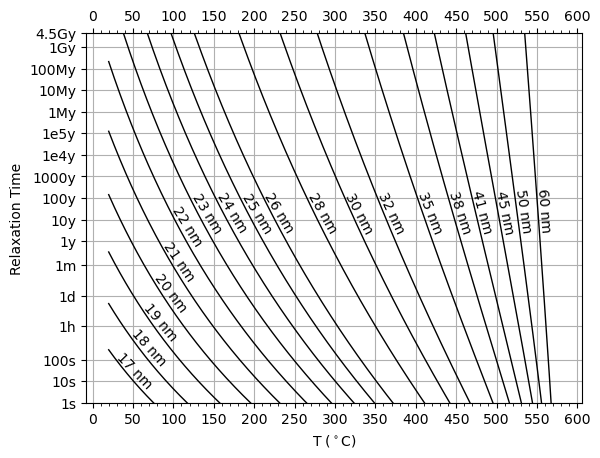

In [89]:
sizes = [17,18,19,20,21,22,23,24,25,26,28,30,32,35,38,41,45,50,60]
plot_pullaiah_curves(thermParticle, sizes, 0, 1, color='k')

# Treatment routines

Any model being run using the `simulations` package first requires a set of treatment steps using the `sdcc.treatment` module. Let's run a relaxation time experiment using the `relaxation_time()` function. We need to specify a field direction (in cartesian coordinates) and field strength (in µT).

In [91]:
from sdcc.simulation import relaxation_time
B_dir = [1,0,0] #Field direction - along x here
B_str = 40 #Field strength - 40uT
relax_routine = relaxation_time(gel_test, B_dir,B_str)

Internally, a routine in the SDCC is broken into a list of sdcc.simulation.TreatmentStep objects. We can see these if we print our relaxation time routine.

In [95]:
relax_routine

[Cooling from 579 to 20°C 
         in 40 μT field,
 VRM acquisition at 20°C 
         in 0 μT field]

Each of these sub steps has a set of temperature, time and field steps. More complicated routines can be constructed from these, for example a Thellier - Coe experiment. Note that for these experiments, we need to specify both an ancient and lab field, as we need to simulate the history of the pre-history of the particle before the experiment.

In [101]:
from sdcc.treatment import coe_experiment
from sdcc.barriers import uniaxial_critical_size

B_anc = 30 #ancient field strength
B_ancdir = [0,0,1] #ancient field direction
temp_steps = [100,200,300,350,400,450,500,520,540,560,579] #Temperature steps for coe experiment

coe_routine = coe_experiment(temp_steps,B_anc,B_str,B_ancdir,B_dir)

A good way of visualizing an experimental treatment is to make a temperature-time plot of the steps. The `sdcc.plotting.plot_routine()` function can do this. Blue lines represent cooling steps, red lines heating steps and purple lines have constant temperature. Dashed lines represent zero-field experiments and solid lines represent in-field experiments.

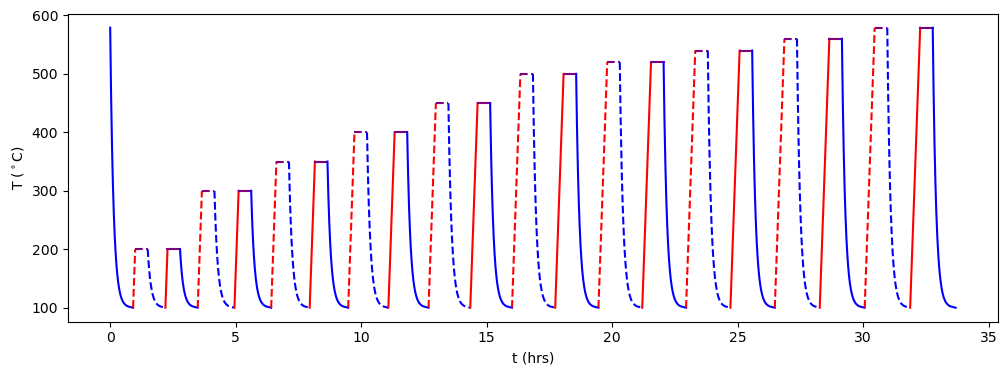

In [104]:
from sdcc.plotting import plot_routine
plot_routine(coe_routine)

# Running simulations with the SDCC

Simulations in the sdcc are run using the `simulations` module. Note that these can be intensive micromagnetic models that may take some time to run. 

Each simulation requires an object to store the energy barriers, a treatment routine, and a particle size to run the simulation at.

## Viscous relaxation time

Our first simulation is to simulate a viscous relaxation to obtain a paleomagnetic relaxation time. Our energy barriers and routine were set up earlier - but we'll set them up again for the purposes of the example. We're going to run a relaxation time experiment on a 21 nm prolate magnetite particle with a prolateness of 2.50, elongated along the hard axis.

In [116]:
import pickle
from sdcc.simulation import relaxation_time

# Read in GEL file for particle
with open('../particles/TM00_PRO_2.50_OBL_1.00_hard.gel', 'rb') as f:
    thermParticle=pickle.load(f)

# Set up treatment routine
B_dir = [1,0,0] #Field direction - along x here
B_str = 40 #Field strength - 40uT
relax_routine = relaxation_time(gel_test, B_dir,B_str)

# Set up particle size
size = 21 #size in nm

Thermal models in the SDCC are run in a "mono dispersion" of particles in uniformly distributed orientations. For this model, we'll simulate the viscous relaxation of the same particle in thirty different orientations. This can be done in the sdcc using the `sdcc.simulation.mono_dispersion()` function. The function outputs a set of magnetic moment vectors that correspond to each time step in each treatment step, as well as a set of probability vectors. Additionally, we need a starting probability of being in each LEM state as the initial condition of the model. We're going to start in a demagnetized state. There are two states, so the probability of each is 1/2.

This code (and most of the code cells going forward) may take several minutes to run as these calculations are intensive. If your computer supports parallelized computations with the sdcc - try running the `parallelized_mono_dispersion()` function instead for better performance. 

In [117]:
from sdcc.simulation import mono_dispersion
starting_prob = [1/2, 1/2] 
moments, probabilities = mono_dispersion(starting_prob, 
                                         size, 
                                         relax_routine, 
                                         thermParticle,
                                         n_dirs = 30)

`moments` here is a list with two elements. One of these elements corresponds to the initial cooling step, and the other corresponds to the heating step. Each element of the list contains an array with the magnetic moment of the ensemble at each time step. 

In the SDCC, we have a specially set up function (`sdcc.plotting.plot_relax_experiment`) to plot the moment magnitudes at each time step, but this could be done manually.

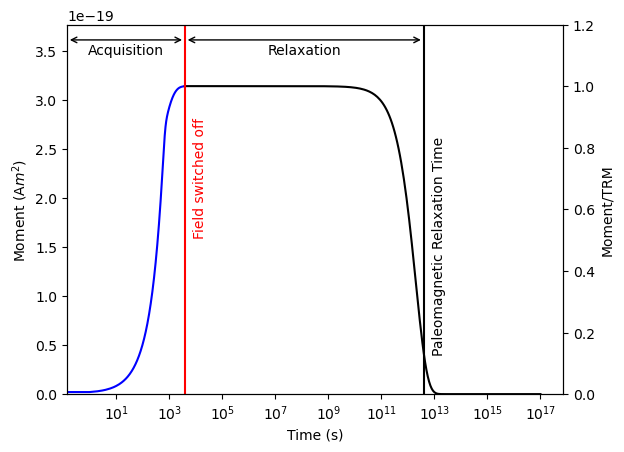

In [118]:
from sdcc.plotting import plot_relax_experiment
plot_relax_experiment(moments, relax_routine)

## Assemblages of grains. 

We can work with assemblages of grains by simply taking the viscous relaxation time for each grain and summing up the moments at each time step, multiplied by the number of grains. First, let's make a gaussian distribution of sizes:

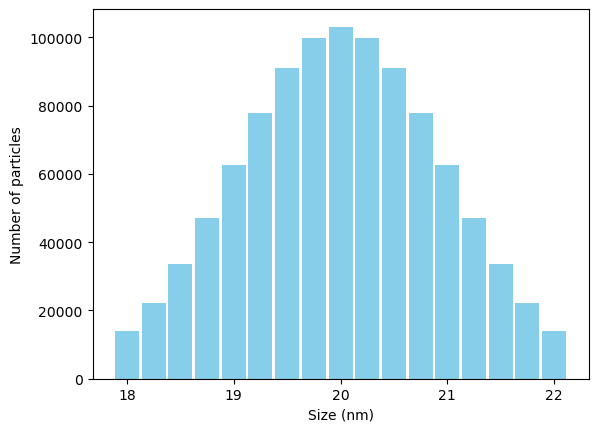

In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

sizes = np.arange(18,22.25,0.25)

weights = np.exp(-(sizes - 20)**2/2) #Gaussian "weight"
weights = weights/np.sum(fracs)*1e6 #Relative number of grains at each size
plt.bar(sizes,weights,color='skyblue',width=0.225);
plt.ylabel('Number of particles')
plt.xlabel('Size (nm)');

We can then loop through our sizes and calculate the moments for each size individually:

In [126]:
m_list = []
for size in sizes:
    print('\n Current Size:',size)
    moments,probs = mono_dispersion(starting_prob,
                                    size, 
                                    relax_routine, 
                                    thermParticle, 
                                    n_dirs=30)
    m_list.append(moments)


 Current Size: 18.0
Working on grain 30 of 30
 Current Size: 18.25
Working on grain 30 of 30
 Current Size: 18.5
Working on grain 30 of 30
 Current Size: 18.75
Working on grain 30 of 30
 Current Size: 19.0
Working on grain 30 of 30
 Current Size: 19.25
Working on grain 30 of 30
 Current Size: 19.5
Working on grain 30 of 30
 Current Size: 19.75
Working on grain 30 of 30
 Current Size: 20.0
Working on grain 30 of 30
 Current Size: 20.25
Working on grain 30 of 30
 Current Size: 20.5
Working on grain 30 of 30
 Current Size: 20.75
Working on grain 30 of 30
 Current Size: 21.0
Working on grain 30 of 30
 Current Size: 21.25
Working on grain 30 of 30
 Current Size: 21.5
Working on grain 30 of 30
 Current Size: 21.75
Working on grain 30 of 30
 Current Size: 22.0


Then we can multiply the moments by the number of particles and sum everything up.

In [127]:
weighted_m_list = np.array(m_list).T * weights
m_sum = np.sum(weighted_m_list, axis = 1)

Let's plot our final result:

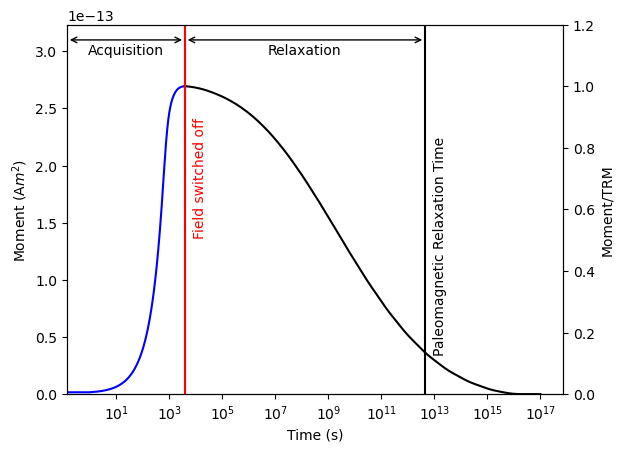

In [128]:
plot_relax_experiment(m_sum, relax_routine)

## Paleointensity Experiments

To run a paleointensity experiment, we first need a distribution of particles. For this experiment, it makes sense to first come up with a blocking temperature distribution, and translate that to a size distribution. The `sdcc.analysis.get_critical_sizes()` function can do this for us.

We can then weight the distribution by its blocking temperatures. Let's assume the blocking temperature distribution is a normal distribution with a mean of 460$^\circ$C and a standard deviation of 50$^\circ$C. We'll weight the average magnetic moments of each of our particles by this amount.

In [ ]:
#from sdcc.analysis import get_critical_sizes
Blocking_Ts = [360,385,410,435,460,485,510,535,555]
sizes = get_critical_sizes(thermParticle, Blocking_Ts)

#Gaussian Distribution 
weights = np.exp(-(np.array(Blocking_Ts) - 460)**2 / (2*50**2))
weights /= sum(weights)

#Make bar plot
plt.bar(Blocking_Ts,coeffs,width=15,color='skyblue');
plt.xlabel('Blocking Temperature ($^\circ$C)')
plt.ylabel('Fraction');

#Plot sizes on bar plot
for i, size in enumerate(sizes):
    if weights[i]>0.04:
        plt.text(Blocking_Ts[i],weights[i]-0.002,'%2.1f'%size+' nm',ha='center',va='top',rotation=90)
    else:
        plt.text(Blocking_Ts[i],weights[i]+0.002,'%2.1f'%size+' nm',ha='center',va='bottom',rotation=90)


We can run the model with the distribution as before. Note that due to the much larger number of steps in the Coe experiment, this will likely take a couple of hours to run.

In [ ]:
m_list = []
for size in sizes:
    print('\n Current Size:',size)
    moments,probs = mono_dispersion(starting_prob,
                                    size, 
                                    coe_routine, 
                                    thermParticle, 
                                    n_dirs=30)
    m_list.append(moments)


 Current Size: 27.245683017354118
Working on grain 30 of 30
 Current Size: 28.48332083825177
Working on grain 30 of 30
 Current Size: 29.898056082724295
Working on grain 30 of 30
 Current Size: 31.55568763857202
Working on grain 30 of 30
 Current Size: 33.561743391491746


For ease of processing Thellier data to obtain Arai/Zijderveld plot data, we have the function `sdcc.analysis.process_thellier_data()`. This applies the weights to the different grains and allows us to plot the Arai plot using `sdcc.plotting.plot_arai()`.

In [ ]:
def process_thellier_data(vs_list, routine, weights):
    steps = []
    for step in routine:
        if step == routine[0]:
            steps.append("TRM")
        elif type(step) == CoolingStep:
            if step.field_strs[0] > 0:
                steps.append("I")
            else:
                steps.append("Z")
        else:
            steps.append("N")
    steps = np.array(steps)

    n = len(steps[steps == "Z"]) + 1

    Zs_tot = np.empty((n, 3, len(vs_list)))
    Is_tot = np.empty((n, 3, len(vs_list)))

    for i, vs in enumerate(vs_list):
        vs = np.array(vs, dtype="object")
        TRM = vs[steps == "TRM"][0][-1]
        Zcools = vs[steps == "Z"]
        Icools = vs[steps == "I"]

        Zs = [TRM]
        for Z in Zcools:
            Zs.append(Z[-1])

        Is = [TRM]
        for I in Icools:
            Is.append(I[-1])

        Zs_tot[:, :, i] = Zs
        Is_tot[:, :, i] = Is

    Zs_sum = np.flip(Zs_tot, axis=2) * weights
    Zs_sum = np.sum(Zs_sum, axis=2)

    Is_sum = np.flip(Is_tot, axis=2) * weights
    Is_sum = np.sum(Is_sum, axis=2)

    Is_sum -= Zs_sum

    Zs_mag = np.linalg.norm(Zs_sum, axis=1)
    Is_mag = np.linalg.norm(Is_sum, axis=1)

    return (Zs_sum, Is_sum, Zs_mag, Is_mag)

We analyze the data from the model as before

In [139]:
from sdcc.treatment import CoolingStep
steps = []
for step in coe_routine:
    if step == coe_routine[0]:
        steps.append('TRM')
    elif type(step) == CoolingStep:
        if step.field_strs[0] > 0:
            steps.append('I')
        else:
            steps.append('Z')
    else:
        steps.append('N')
